# Importing the Libraries


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
from numpy import mean
from numpy import std
from numpy import absolute


# Loading the Dataset


In [2]:
## To upload from the local drive
from google.colab import files
data = files.upload()

## Read csv data - The .xlsx format was not working in Safari browser for Google Colab (converted file to csv)
data = pd.read_csv("ENB2012_data.csv",skip_blank_lines=True, na_filter=True)
data.head()

Saving ENB2012_data.csv to ENB2012_data.csv


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
## Converting file to csv led to some Null rows in the data (originally data had no null values - as mentioned in the data documentation)
data.dropna(inplace=True)
data.isna().sum()/len(data)

,0
X1,0.0
X2,0.0
X3,0.0
X4,0.0
X5,0.0
X6,0.0
X7,0.0
X8,0.0
Y1,0.0
Y2,0.0


# **1. Data Preparation**

## Giving column names

In [4]:
## Replaced original column names to the Column description provided in data documentation
data.columns= ['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load']


# EDA

## Data Summary

In [5]:
## Checking Data Types and Counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
## Checking Summary statistics for the data
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Checking relationship between the variables

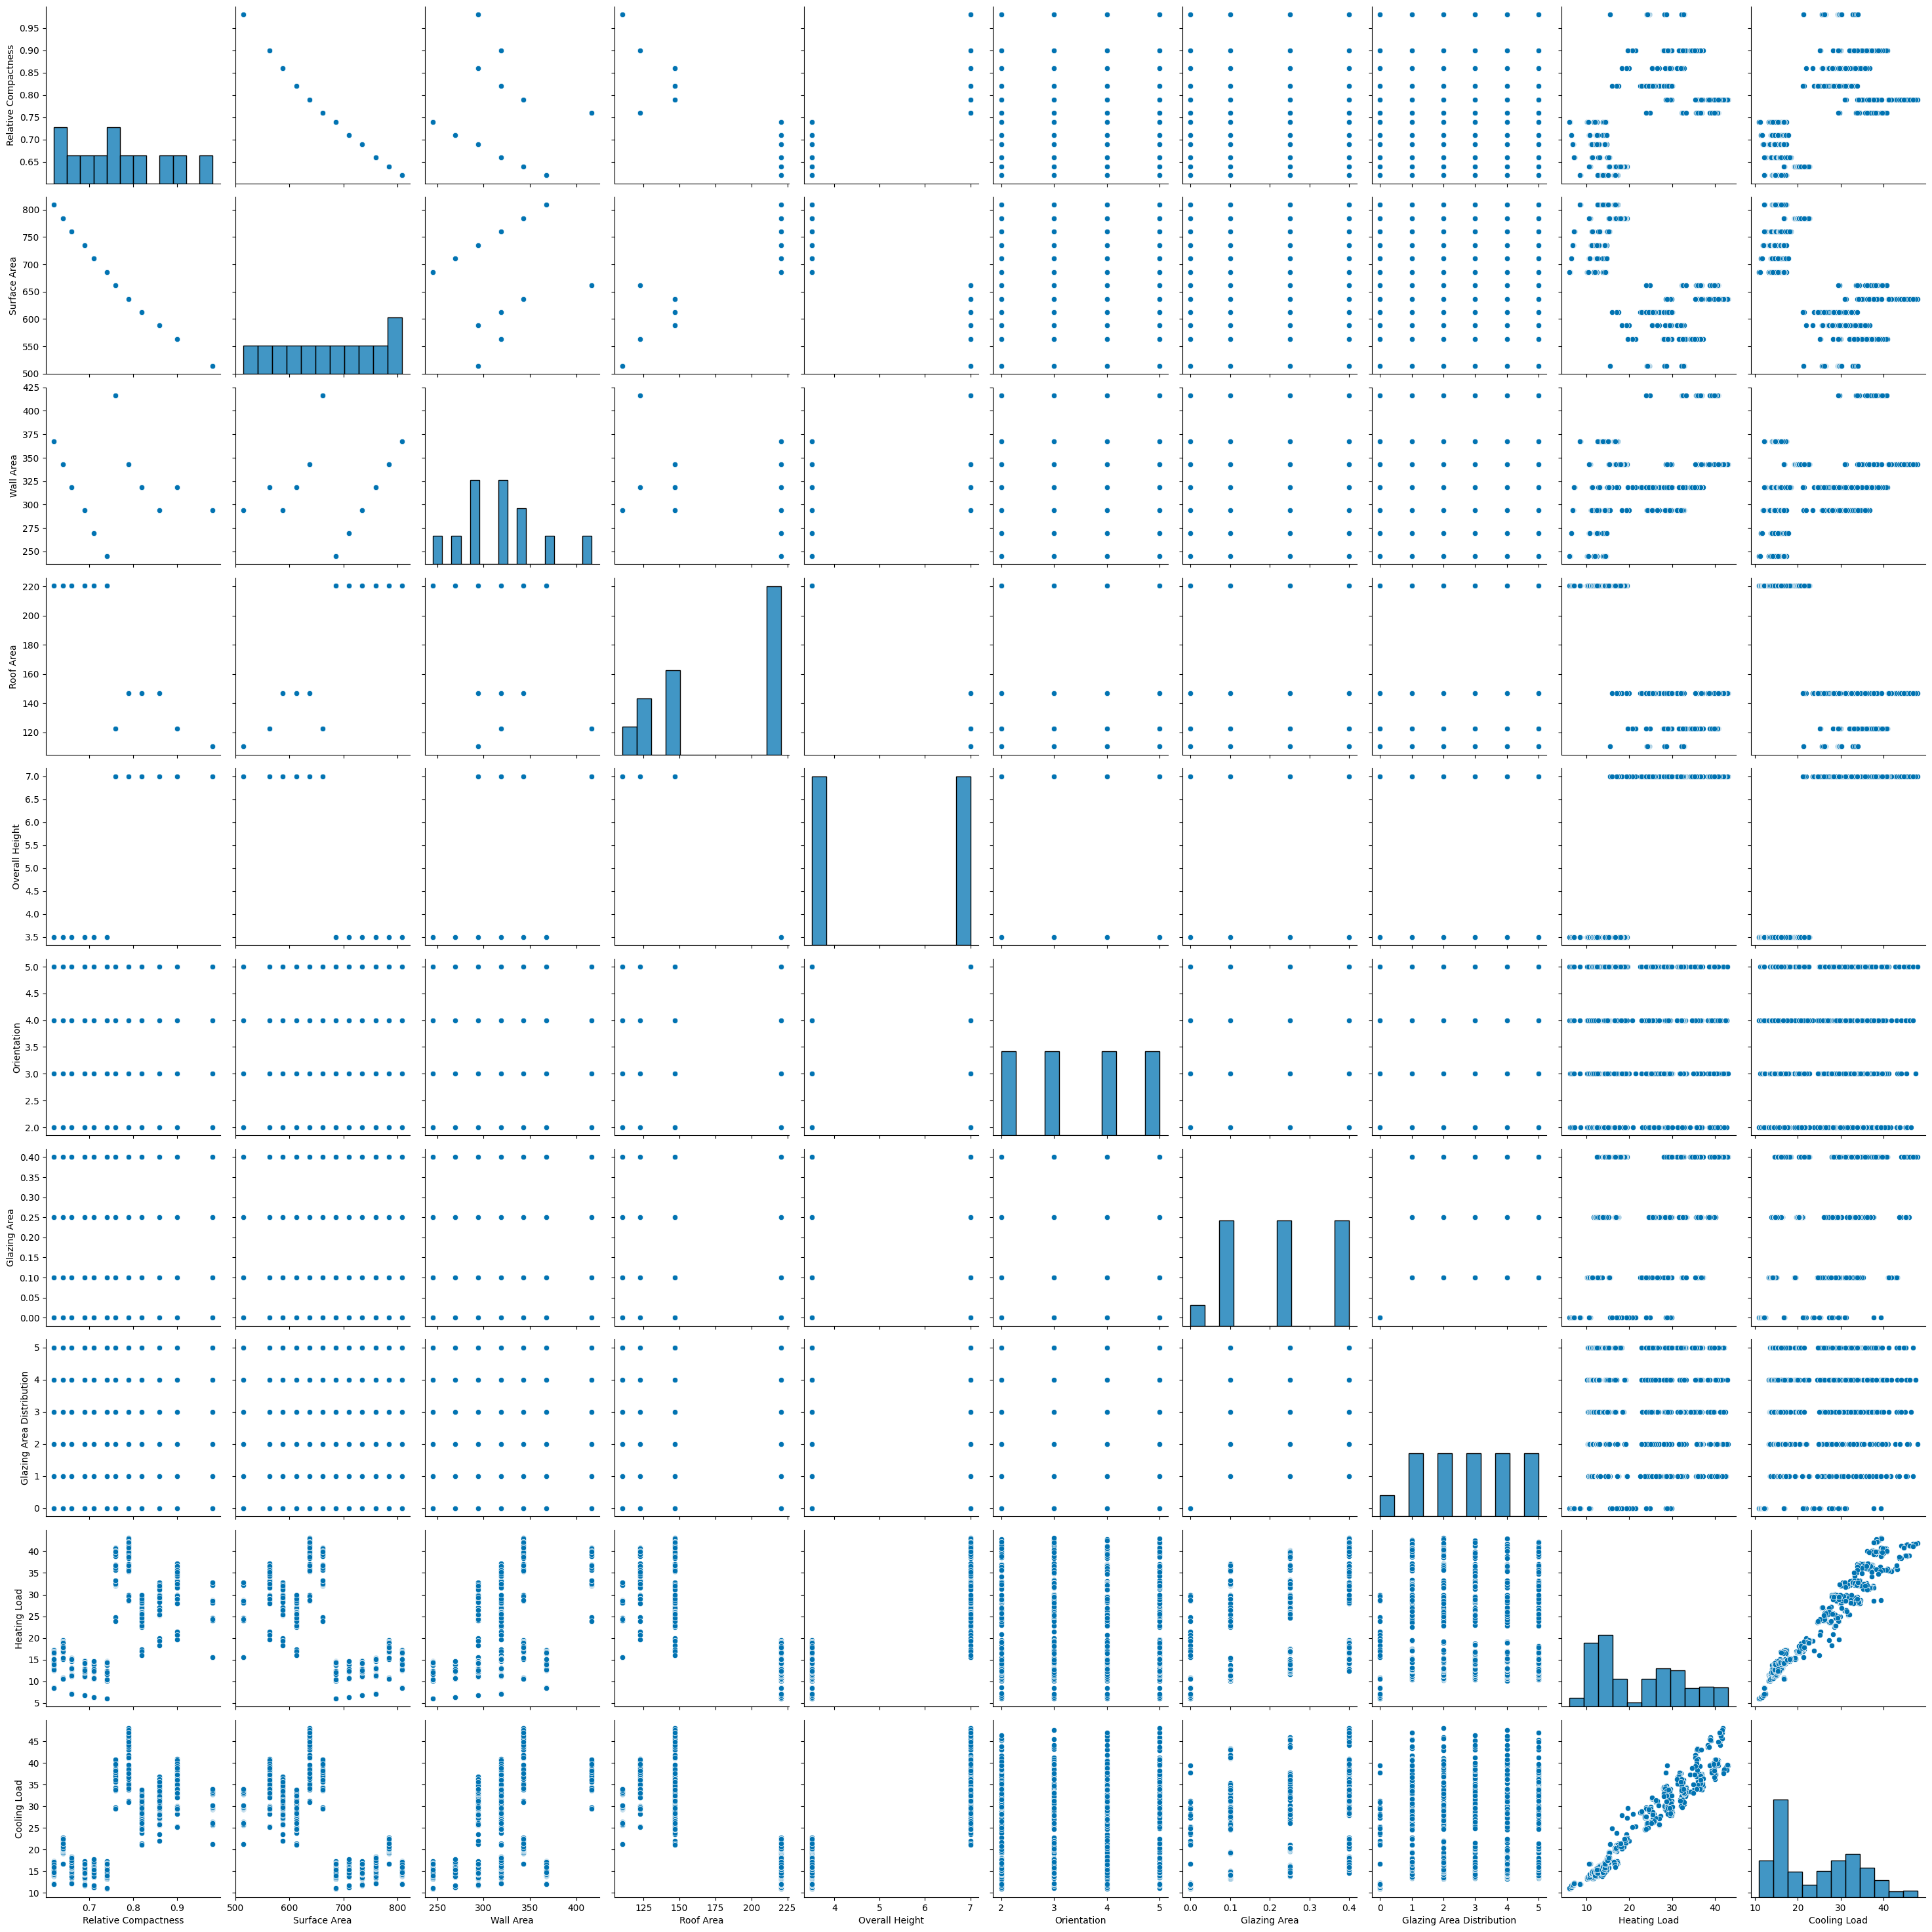

In [7]:
## Visualise Relationship between variables
sns.set_palette('colorblind')
sns.pairplot(data=data, height=3)

<Axes: >

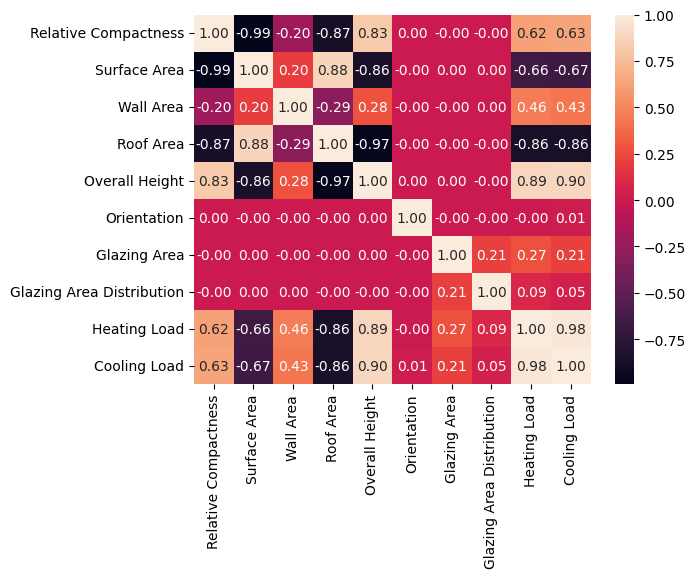

In [8]:
## Using correlation to identify relationship within the variables
data_corr= data.corr()
sns.heatmap(data_corr, annot=True, fmt='.2f')

## Distribution of variables

The distribution plots of all the variables are plotted to check for outliers and skewness of the data.

<Axes: xlabel='Relative Compactness', ylabel='Density'>

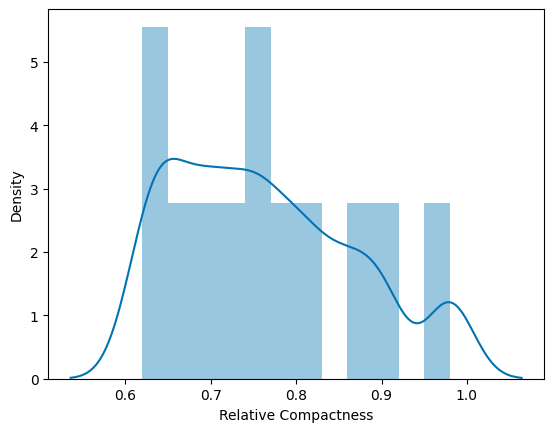

In [9]:
sns.distplot(data['Relative Compactness'])

<Axes: xlabel='Surface Area', ylabel='Density'>

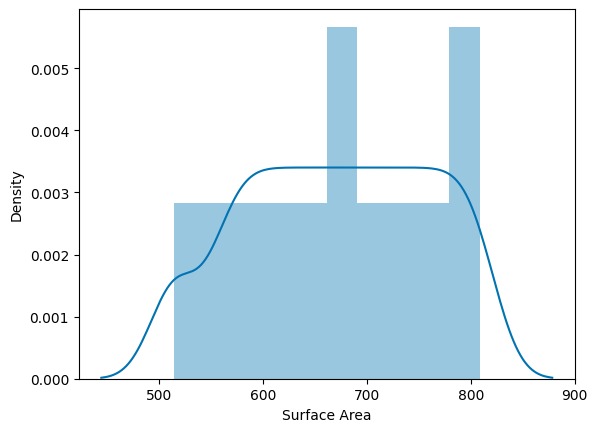

In [10]:
sns.distplot(data['Surface Area'])

<Axes: xlabel='Wall Area', ylabel='Density'>

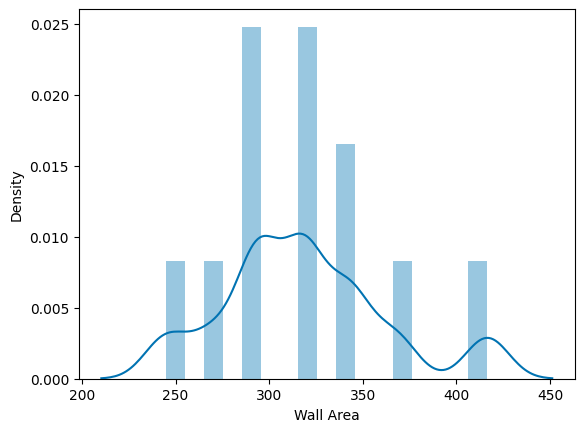

In [11]:
sns.distplot(data['Wall Area'])

<Axes: xlabel='Roof Area', ylabel='Density'>

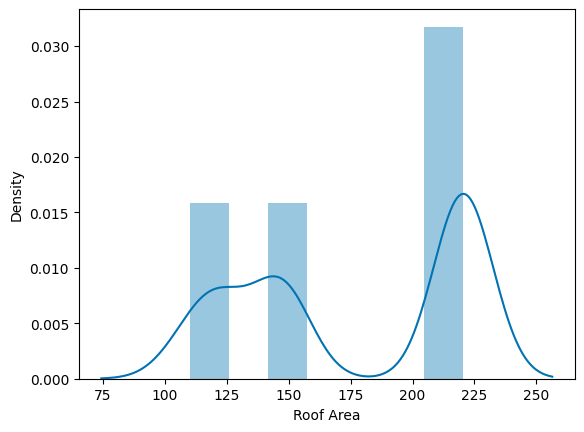

In [12]:
sns.distplot(data['Roof Area'])

<Axes: xlabel='Overall Height', ylabel='Density'>

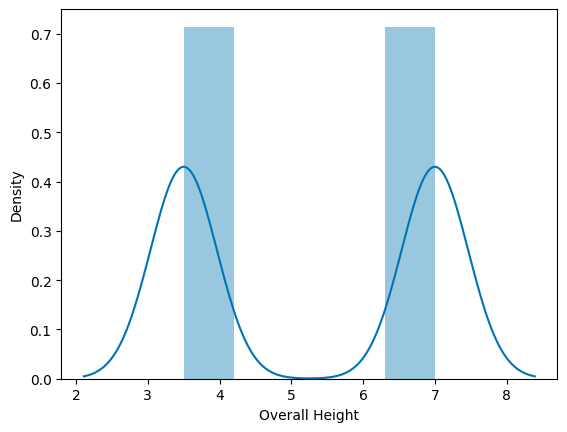

In [13]:
sns.distplot(data['Overall Height'])

<Axes: xlabel='Orientation', ylabel='Density'>

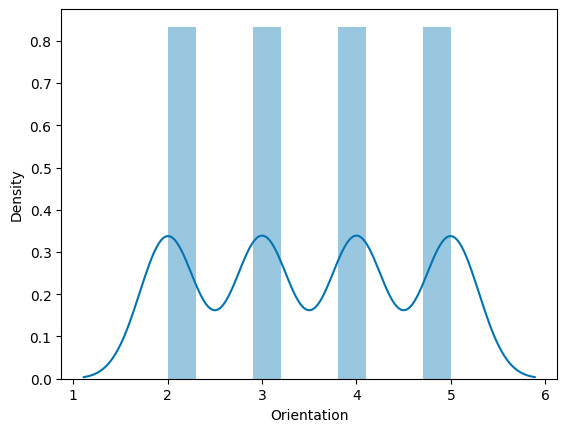

In [14]:
sns.distplot(data['Orientation'])

<Axes: xlabel='Glazing Area Distribution', ylabel='Density'>

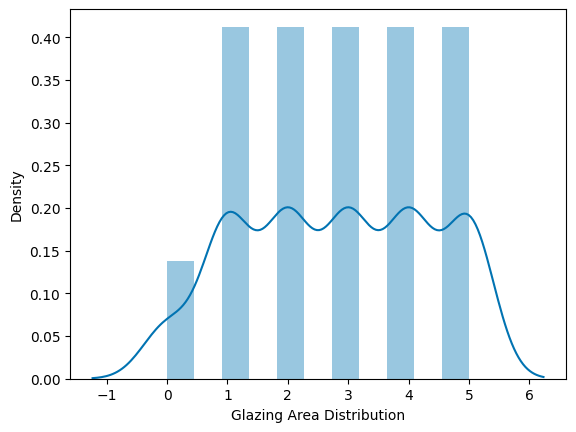

In [15]:
sns.distplot(data['Glazing Area Distribution'])

<Axes: xlabel='Heating Load', ylabel='Density'>

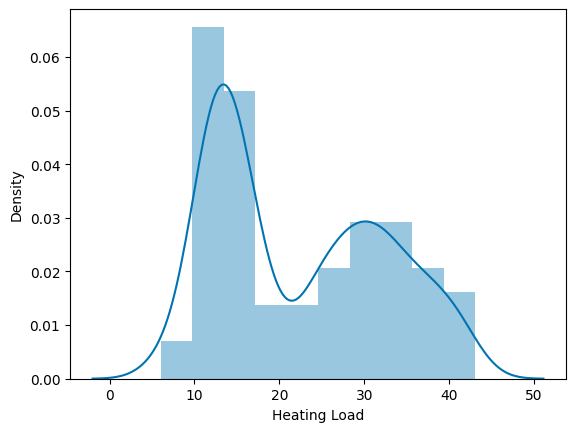

In [16]:
sns.distplot(data['Heating Load'])

<Axes: xlabel='Cooling Load', ylabel='Density'>

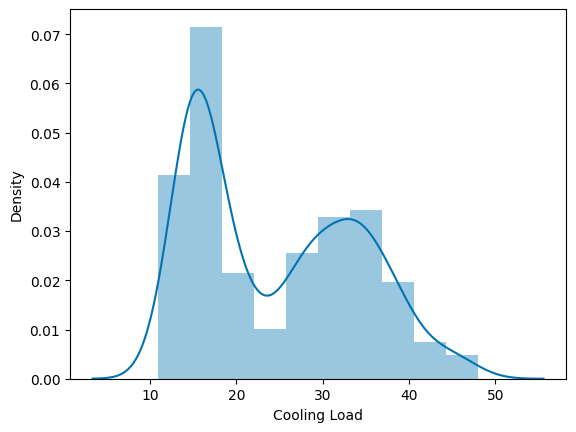

In [17]:
sns.distplot(data['Cooling Load'])

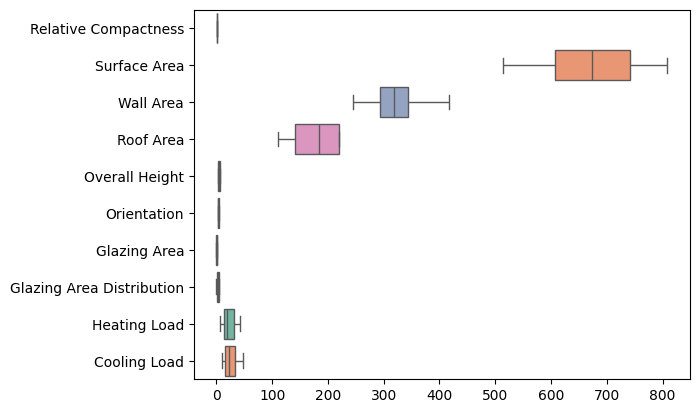

In [18]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")

The above Distribution plots and Boxplot also shows no presence of outliers.

Note: The outliers are checked before data scaling as scaling might impact the outliers.

### Checking for Skewness

In [19]:
print('skewness value of Variables: ',data.skew())

skewness value of Variables:  Relative Compactness         0.495513
Surface Area                -0.125131
Wall Area                    0.533417
Roof Area                   -0.162764
Overall Height               0.000000
Orientation                  0.000000
Glazing Area                -0.060254
Glazing Area Distribution   -0.088689
Heating Load                 0.360449
Cooling Load                 0.395992
dtype: float64


Skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value indicates the presence of extreme value or outlier, which is not valid in this case.

# Data Preprocessing

Due to difference in scales and existence of large values within parameters it becomes vital to perform the min max scaling for the data

The data is plotted to visualize the range of values for variables in compraison with each other.

In [20]:
## Using Minmax scaler for data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data1 = scaler.transform(data)

(array([[768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., 128., 192., 192., 256.],
        [  0.,   0.,   0., 512., 192.,  64.,   0.,   0.,   0.,   0.],
        [  0., 384., 384.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0.  ,  80.85, 161.7 , 242.55, 323.4 , 404.25, 485.1 , 565.95,
        646.8 , 727.65, 808.5 ]),
 <a list of 10 BarContainer objects>)

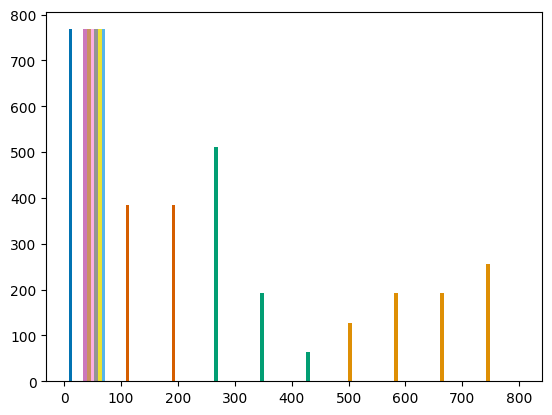

In [21]:
## Comparing pre and Post scaled data

## Pre-Scaled
plt.hist(data)

(array([[128., 128.,  64., 128.,  64.,  64.,  64.,  64.,   0.,  64.],
        [ 64.,  64.,  64.,  64.,  64., 128.,  64.,  64.,  64., 128.],
        [ 64.,  64., 192.,   0., 192., 128.,   0.,  64.,   0.,  64.],
        [ 64., 128.,   0., 192.,   0.,   0.,   0.,   0.,   0., 384.],
        [384.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 384.],
        [192.,   0.,   0., 192.,   0.,   0., 192.,   0.,   0., 192.],
        [ 48.,   0., 240.,   0.,   0.,   0., 240.,   0.,   0., 240.],
        [ 48.,   0., 144.,   0., 144.,   0., 144.,   0., 144., 144.],
        [ 20., 187., 153.,  39.,  39.,  59.,  83.,  83.,  59.,  46.],
        [118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 BarContainer objects>)

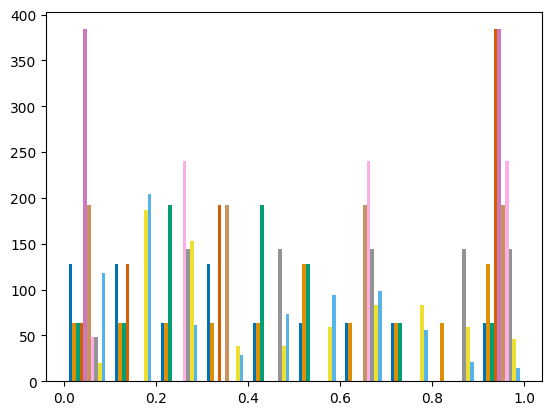

In [22]:
## Post-scaled
plt.hist(data1)

In [23]:
## Converting scaled arry into a dataframe
df = pd.DataFrame(data1, columns =data.columns)

In [24]:
## Checking Summary Statistics for scaled data
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,0.439396,0.368644
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,0.272046,0.256216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,0.188258,0.127121
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,0.348881,0.301104
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,0.691763,0.598775
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

### Removing variables high-multicollinearity

<Axes: >

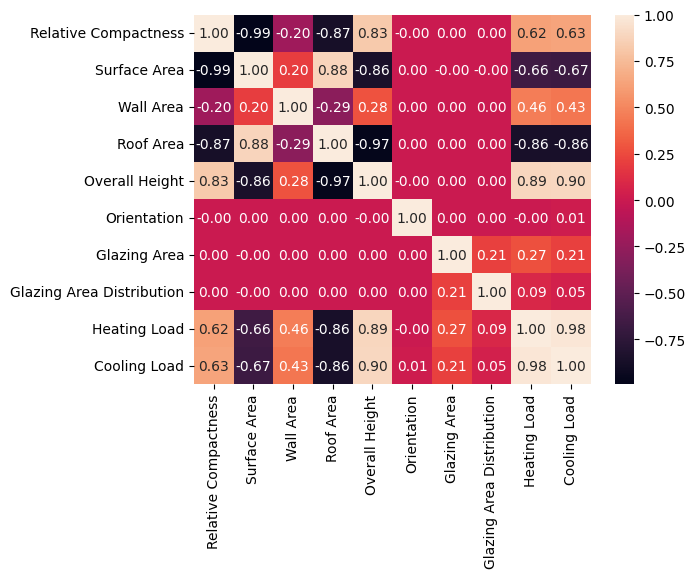

In [25]:
#Checking for Correlation between the variables - correltion above 0.5 or below -0.5 is considered to be high
df_corr= df.dropna().corr()
sns.heatmap(df_corr, annot=True, fmt='.2f')

#### Using VIF for variable reduction as many variables have high multi-collinearity

In [26]:
features=df[['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution']]

In [27]:
vif_data = pd.DataFrame()
vif_data["Variable"] = features.columns

In [28]:
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

In [29]:
vif_data

,Variable,VIF
0,Relative Compactness,105.524054
1,Surface Area,31190.507641
2,Wall Area,5459.755056
3,Roof Area,17319.814328
4,Overall Height,31.205474
5,Orientation,1.000000
6,Glazing Area,1.047508
7,Glazing Area Distribution,1.047508


In [30]:
## Setting Threshold for VIF
new_feat = vif_data[vif_data.VIF<150].Variable

Variables with High VIF are removed as they have high multicollinearity.

The Threshold of 150 is identified by performing trial-and error method.
A VIF theshold of less than 100, removes 4 variables and led to a lower model performance.
A VIF Threshold of 6000 to remove 2 varibles is giving the same accuracy as VIF Threshold of 150 (removing 3 variables).

Therefore, to improve computation without compromising on Accuracy the treshold for VIF is chosen as 150.

In [31]:
## Defining Features using the VIF threshold selected models
features=df[df.columns[df.columns.isin(new_feat)]]
features

,Relative Compactness,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,1.000000,1.0,0.000000,0.0,0.0
1,1.000000,1.0,0.333333,0.0,0.0
2,1.000000,1.0,0.666667,0.0,0.0
3,1.000000,1.0,1.000000,0.0,0.0
4,0.777778,1.0,0.000000,0.0,0.0
...,...,...,...,...,...
763,0.055556,0.0,1.000000,1.0,1.0
764,0.000000,0.0,0.000000,1.0,1.0
765,0.000000,0.0,0.333333,1.0,1.0
766,0.000000,0.0,0.666667,1.0,1.0


In [32]:
## Defining the Target variables
target=df[['Heating Load','Cooling Load']]

# **2. Model Selection and Evaluation**

## Train Test Split

In [33]:
## Using 70-30 split for dividing Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.20, random_state=42)

# Regression Models

4 Regression Models are applied and accuracy is checked and compared

## 1. Linear Regression

We can use linear regression as we have to model a linear relationship between the dependent and independent variables (features)

### Modelling Fitting

In [34]:
## Fitting the Linear regression model
reg = LinearRegression().fit(X_train, y_train)

This score provides the model accuracy- A score closer to 1 provides a higher accuracy.

In [35]:
## Computing Regression Coefficient
reg.coef_

array([[-3.34224527e-01,  6.43911466e-01,  6.17650819e-04,
         2.16791154e-01,  2.95732757e-02],
       [-2.90473749e-01,  5.97469639e-01,  6.77484530e-03,
         1.59665468e-01,  5.58926325e-03]])

In [36]:
## Computing Regression Intercept
reg.intercept_

array([0.10565029, 0.08380818])

### Model Predctions and Accuracy

Using the model we try to predict the values of X_test, later the predicted values are compared with the actual values - y_test, to check for the accuracy

In [37]:
## Model Predictions
predicted=reg.predict(X_test)
y_pred = pd.DataFrame(predicted, columns =['Predicted_Heating_Load', 'Predicted_Cooling_Load'])

The value closer to 1 implies higher model accuracy

In [38]:
## Computing RMSE
rmse = sqrt(mean_squared_error(y_test, predicted))
rmse

0.0850798125702081

A lower value of Root Mean Squared Error (RMSE) indictaes a low error value and better accuracy

In [39]:
## Computing MAE
mae=mean_absolute_error(y_test, predicted)
mae

0.06289227794212177

A lower value of MAE imply low error value i.e. more accuracy

In [40]:
## Computing the Linear regression model score - R sq
Rsq=reg.score(X_test, y_test)
Rsq

0.8983881153247076

The value of R Squared closer to 1 implies higher model accuracy

### Regression plot

Text(0.5, 1.0, 'Regression Plot: Actual vs Predicted')

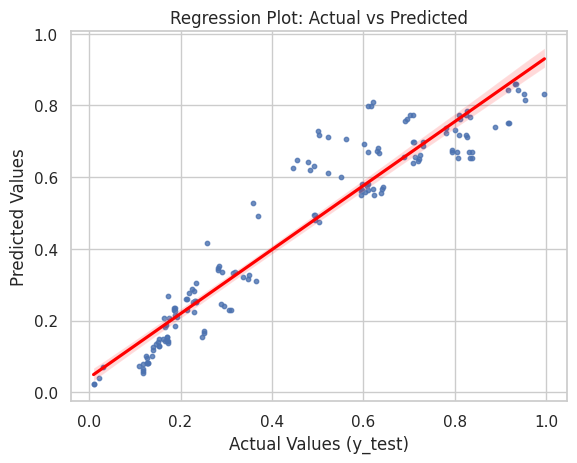

In [41]:
sns.set(style="whitegrid")

sns.regplot(x=y_test['Heating Load'], y=y_pred['Predicted_Heating_Load'], scatter_kws={'s': 10}, line_kws={'color': 'red'})  # 's' controls the size of scatter points

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Regression Plot: Actual vs Predicted')


The chart represents the predictions using Linear Regression vs the actual values with the best fit line

## 2 - Lasso Regression

Lasso (Least Absolute Shrinkage and Selection Operator) regression is useful when you want to perform variable selection in addition to modeling, as it can shrink some coefficients to zero, effectively eliminating less important features. Therefore, we can use all the features in this method instead of shortlisting features using VIF, as the model takes care of less important ones.

In [42]:
## Taking all the features for the model (unlike 5 features for linear regression)
features_l=df[['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution']]

In [43]:
## Using 70-30 split for dividing Training and Test Data
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    features_l, target, test_size=0.20, random_state=42)

### Hyperparameter Tuning

In [44]:
## Grid-search for best parameter values
param_grid_lasso = {'alpha' : [0.018, 0.02, 0.024, 0.029, 0.031]}
grid_lasso = GridSearchCV(estimator=Lasso(), param_grid=param_grid_lasso, scoring='accuracy')
grid_lasso.fit(X_train_l, y_train_l)
print(grid_lasso.best_params_)

{'alpha': 0.018}


In [45]:
## Defining the Lasso regression model basis the best parameter identified in grid search
model = Lasso(alpha=0.018)

In [46]:
## Fitting the Lasso regression model
lasso_reg = model.fit(X_train_l, y_train_l)

In [47]:
## Regression Intercept
lasso_reg.intercept_

array([0.19813229, 0.17476458])

In [48]:
## Regression Coefficient
lasso_reg.coef_

array([[ 0.        , -0.        ,  0.        , -0.        ,  0.40956175,
         0.        ,  0.06068289,  0.        ],
       [ 0.        , -0.        ,  0.        , -0.        ,  0.38448752,
         0.        ,  0.        ,  0.        ]])

### Model Predctions and Accuracy

Using the model we try to predict the values of X_test, later the predicted values are compared with the actual values - y_test, to check for the accuracy

In [49]:
## Lasso Regression Model Predictions
predicted_l=lasso_reg.predict(X_test_l)
y_pred_l = pd.DataFrame(predicted_l, columns =['Predicted_Heating_Load', 'Predicted_Cooling_Load'])

The value closer to 1 implies higher model accuracy

In [50]:
## Computing RMSE
rmse_l = sqrt(mean_squared_error(y_test_l, predicted_l))
rmse_l

0.12187488633388141

A lower value of Root Mean Squared Error (RMSE) indicates lower error and higher accuracy.

In [51]:
## Computing MAE
mae_l=mean_absolute_error(y_test, predicted_l)
mae_l

0.09638363163544424

A lower value of MAE implies lower error and higher accuracy

In [52]:
## Computing the Lasso regression model score
Rsq_l=lasso_reg.score(X_test_l, y_test_l)
Rsq_l

0.7916194652780311

The value of R Squared closer to 1 implies higher model accuracy

### Regression Plot

Text(0.5, 1.0, 'Lasso Regression Plot: Actual vs Predicted')

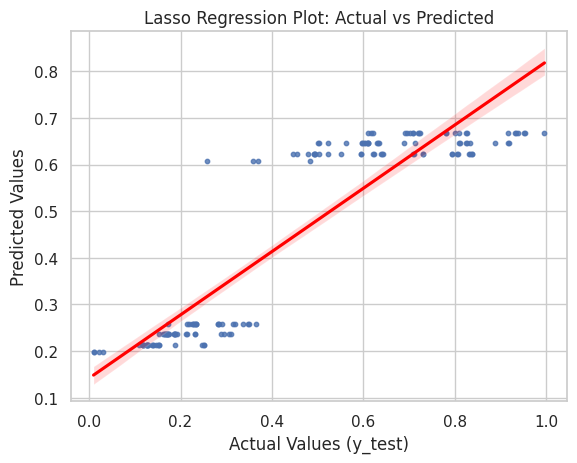

In [53]:
sns.set(style="whitegrid")

sns.regplot(x=y_test_l['Heating Load'], y=y_pred_l['Predicted_Heating_Load'], scatter_kws={'s': 10}, line_kws={'color': 'red'})  # 's' controls the size of scatter points

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression Plot: Actual vs Predicted')

The chart represents the predictions using Lasso Regression vs the actual values with the best fit line

### Cross-Validation for Lasso Regression

Using Cross validation to see if the results of Lasso regression can be improved further

In [54]:
# Using Cross-Validation to check the best possible performance
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, cv=cv)
print('Avg MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Avg MAE: 0.792 (0.023)


In [55]:
#List of Cross-validation scores
scores

array([0.80629318, 0.77895296, 0.78469529, 0.75912888, 0.83661439,
       0.79705522, 0.84552754, 0.76925521, 0.79051776, 0.75234872,
       0.79458065, 0.7872188 , 0.80090256, 0.72853787, 0.79881084,
       0.80443594, 0.83068851, 0.77351073, 0.78963585, 0.79611797,
       0.79610603, 0.80356619, 0.78377335, 0.77991849, 0.78332122,
       0.81317871, 0.79881634, 0.78782212, 0.78972436, 0.78776115])

The Mean score from cross validation is similar to the Ridge regression score. Therefore, the performance cannot be further improved using model parameters

## 3 - Ridge Regression

Ridge regression is ideal as we have multicollinearity among predictors as it adds an L2 penalty to the loss function to shrink the coefficients, but unlike lasso, it doesn't set any coefficients to zero. Therefore, we can use all the features in this method instead of shortlisting features using VIF, as the model takes care of less important ones.

### Hyperparameter Tuning

In [56]:
## Grid-search for best parameter values
param_grid_rid = {'alpha' : [0.08, 0.1, 0.3, 0.6, 0.8,0.9, 1, 1.2]}
grid_rid = GridSearchCV(estimator=Ridge(), param_grid=param_grid_rid, scoring='accuracy')
grid_rid.fit(X_train_l, y_train_l)
print(grid_rid.best_params_)

{'alpha': 0.08}


### Model Fitting

In [57]:
## Defining and Fitting the Ridge Regression
rid_reg = Ridge(alpha=0.08)
rid_reg.fit(X_train_l, y_train_l)


Ridge(alpha=0.08)

In [58]:
## Regression Coefficient
lasso_reg.coef_

array([[ 0.        , -0.        ,  0.        , -0.        ,  0.40956175,
         0.        ,  0.06068289,  0.        ],
       [ 0.        , -0.        ,  0.        , -0.        ,  0.38448752,
         0.        ,  0.        ,  0.        ]])

In [59]:
## Computing Regression Intercept
rid_reg.intercept_

array([0.52361992, 0.5764416 ])

The value closer to 1 implies higher model accuracy

### Model Predctions and Accuracy

In [60]:
## Model Predictions Ridge Regression
predicted_rid=rid_reg.predict(X_test_l)
y_pred_rid = pd.DataFrame(predicted_rid, columns =['Predicted_Heating_Load', 'Predicted_Cooling_Load'])

In [61]:
## Computing RMSE
rmse_r = sqrt(mean_squared_error(y_test_l, predicted_rid))
rmse_r

0.08329495538110593

A lower value of Root Mean Squared Error (RMSE) indicates lower error and higher accuracy.

In [62]:
## Computing MAE
mae_r=mean_absolute_error(y_test_l, predicted_rid)
mae_r

0.059092262390895614

A lower value of MAE implies a lower error and thereby higher accuracy

In [63]:
## Computing the Linear regression model score
Rsq_r=rid_reg.score(X_test_l, y_test_l)
Rsq_r

0.902389632895439

The value of R Squared closer to 1 implies higher model accuracy

### Regression Plot

Text(0.5, 1.0, 'Ridge Regression Plot: Actual vs Predicted')

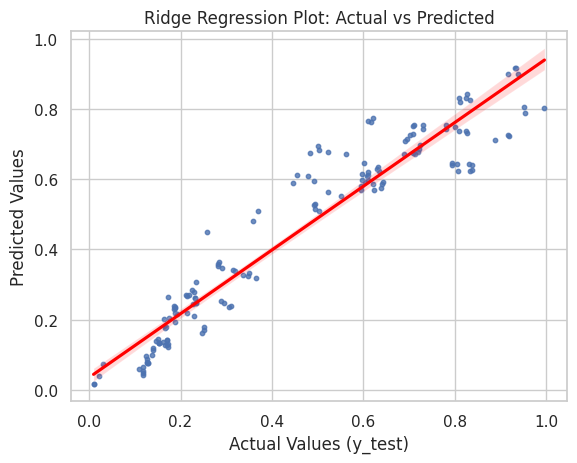

In [64]:
sns.set(style="whitegrid")

sns.regplot(x=y_test['Heating Load'], y=y_pred_rid['Predicted_Heating_Load'], scatter_kws={'s': 10}, line_kws={'color': 'red'})  # 's' controls the size of scatter points

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression Plot: Actual vs Predicted')

The chart represents the predictions using Ridge Regression vs the actual values with the best fit line

#  Recommendations for future observations

Ridge Regression performs better than the other models in terms of accuracy metrics (RMSE, MAE and R square). The model captures well a linear relationship between the target and feature variables. Ridge Regression works best here as it is better suited for dealing with multicollinearity, which exists in the given data.

So, it is recommended to use this model to compute predictions for future observations.

The model is performing better on the Test data, implying low overfitting, but the model performance can further improved using cross-validation. Which can be the scope for further analysis.



**Analysis**

We can also observe that a -
Higher surface area and roof area can decrease the heating and cooling load. High wall area and a high overall height can increase the heating and cooling load. Orientation might not have any impact on the heating and cooling load

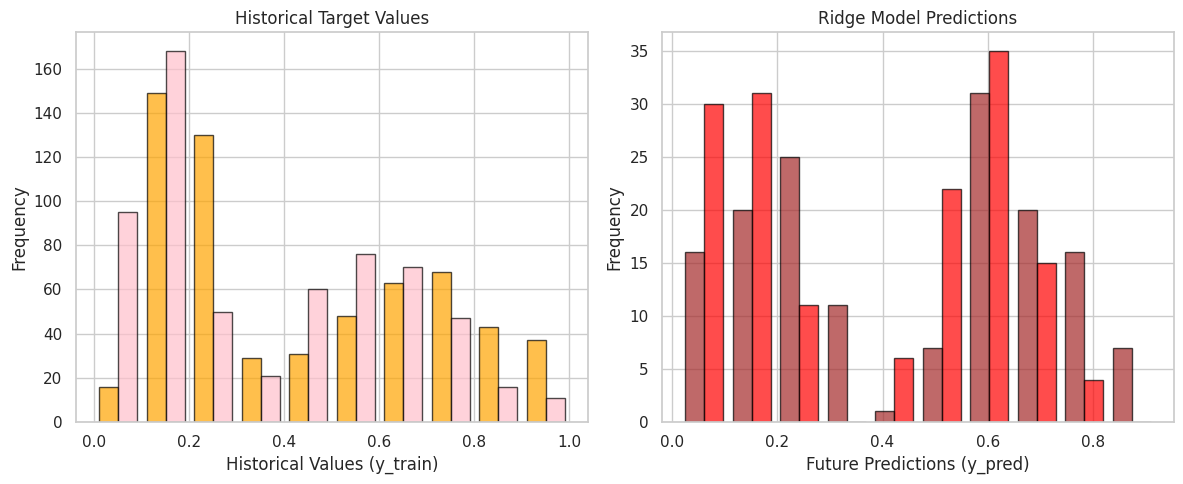

In [143]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Plot the histogram for y_train
ax[0].hist(y_train, bins=10, color=['orange', 'pink'], alpha=0.7, edgecolor='black')
ax[0].set_title('Historical Target Values')
ax[0].set_xlabel('Historical Values (y_train)')
ax[0].set_ylabel('Frequency')
# Plot the histogram for y_pred_rid
ax[1].hist(y_pred_rid, bins=10, color=['brown','red',], alpha=0.7, edgecolor='black')
ax[1].set_title('Ridge Model Predictions')
ax[1].set_xlabel('Future Predictions (y_pred)')
ax[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

 We can see in the above charts that the value of 'Heating Load' and 'Cooling Load' has increased in comparison to the historical values.

In [ ]:
df_corr= df.dropna().corr()
sns.heatmap(df_corr, annot=True, fmt='.2f')

# **3. Neural Network Integration**

## 4 - Regression using Neural Networks

The feedforward neural networks are the models where layers are added in a straightforward sequence, which applies for this regression use case. It is used for simple regression models where the relationship between input and output is linear or non-linear.

The model minimizes the MSE during training to make its predictions as close as possible to the true value. Therefore, we can use all the features in this method instead of shortlisting features using VIF.

In [93]:
## Defining the Model and its parameters
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2)
])
# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

In [103]:
## Fitting the Model
history = nn_model.fit(X_train_l, y_train_l, epochs=50, verbose=0)

### Model Predctions and Accuracy

In [104]:
## Model Predictions using NN Regression
predicted_nn = nn_model.predict(X_test_l)
y_pred_nn = pd.DataFrame(predicted_nn, columns =['Predicted_Heating_Load', 'Predicted_Cooling_Load'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [105]:
## Computing RMSE
rmse_nn = sqrt(mean_squared_error(y_test_l, predicted_nn))
rmse_nn

0.07944299925852608

A lower value of Root Mean Squared Error (RMSE) indicates lower error and higher accuracy.

In [106]:
## Computing MAE
mae_nn=mean_absolute_error(y_test_l, predicted_nn)
mae_nn

0.05433344115304685

A lower value of MAE implies lower error and thereby higher accuracy

In [107]:
## Computing R Squared Score
Rsq_nn = r2_score(y_test_l, predicted_nn)
Rsq_nn

0.910692572593689

In [108]:
Rsq_nn

0.910692572593689

The value closer to 1 implies higher model accuracy

### Regression Plot

Text(0.5, 1.0, 'NN Regression Plot: Actual vs Predicted')

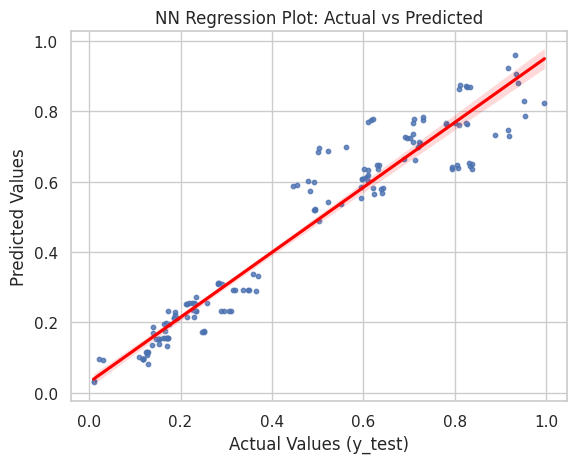

In [144]:
sns.set(style="whitegrid")

sns.regplot(x=y_test['Heating Load'], y=y_pred_nn['Predicted_Heating_Load'], scatter_kws={'s': 10}, line_kws={'color': 'red'})  # 's' controls the size of scatter points

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('NN Regression Plot: Actual vs Predicted')

The chart represents the predictions using Regression with Neural Networks vs the actual values with the best fit line

# Best Model

Comparing all the above methods we ca see that most of the models provide similar results, but the regression using neural networks gives the best (highest) Rsq value 0.912, lowest RMSE 0.079, and lowest MAE 0.054

In [145]:
metrics_1 = {'Model': 'Linear Regression', 'RMSE': rmse, 'MAE': mae, 'R-Sqaured': Rsq}
metrics_2 = {'Model': 'Ridge Regression', 'RMSE': rmse_l, 'MAE': mae_l, 'R-Sqaured': Rsq_l}
metrics_3 = {'Model': 'Lasso Regression', 'RMSE': rmse_r, 'MAE': mae_r, 'R-Sqaured': Rsq_r}
metrics_4 = {'Model': 'NN Regression', 'RMSE': rmse_nn, 'MAE': mae_nn, 'R-Sqaured': Rsq_nn }

# Collect the metrics into a list (one entry for each model)
all_metrics = [metrics_1, metrics_2, metrics_3, metrics_4]

# Convert the list of dictionaries into a pandas DataFrame
metrics_df = pd.DataFrame(all_metrics).sort_values(['R-Sqaured'], ascending=False)


,Model,RMSE,MAE,R-Sqaured
3,NN Regression,0.079443,0.054333,0.910693
2,Lasso Regression,0.083295,0.059092,0.902390
0,Linear Regression,0.085080,0.062892,0.898388
1,Ridge Regression,0.121875,0.096384,0.791619


In [146]:
metrics_df

,Model,RMSE,MAE,R-Sqaured
3,NN Regression,0.079443,0.054333,0.910693
2,Lasso Regression,0.083295,0.059092,0.902390
0,Linear Regression,0.085080,0.062892,0.898388
1,Ridge Regression,0.121875,0.096384,0.791619
